In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import expit

In [2]:
ex2data1 = np.genfromtxt('ex2data1.txt', delimiter=",")

In [3]:
#extract data
X = ex2data1[:,0:2]
y = ex2data1[:,2]

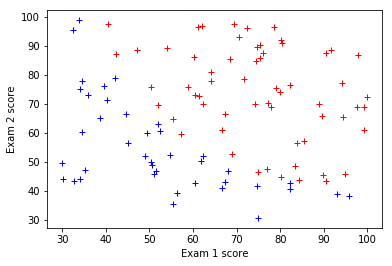

In [4]:
#plot data
pos = ex2data1[ex2data1[:,2] == 1][:,0:2]
neg = ex2data1[ex2data1[:,2] == 0][:,0:2]
plt.plot(pos[:,0], pos[:,1], 'r+')
plt.plot(neg[:,0], neg[:,1], 'b+')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

In [5]:
#add ones to X
X = np.c_[np.ones((len(ex2data1))), X]

In [6]:
def sigmoid(x):
    expit(x)